# Single layer perceptron for Logistic Regression
Learn how Perceptron is built from scratch and used to predict *Digit* from Sign language digit images.

Goal:

1. Load dataset
2. Build model for Logistic Regression

## Import required libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load and understand dataset

About dataset:

+ In this data, there are 2062 sign language digit images
+ There are 10 unique sign (0, ..., 9)
+ For sake of simplicity, we'll use images for '0' and '1'
+ In data, sign '0' is between indices 204 and 408. Therefore, number of '0' sign images is 205. 
+ Also, sign '1' is between indices 822 and 1027, so number of '1' sign images is 206. 

In [6]:
# Load dataset
x_l = np.load('Data/SignLanguageDigits/X.npy')
y_l = np.load('Data/SignLanguageDigits/Y.npy')

(-0.5, 63.5, 63.5, -0.5)

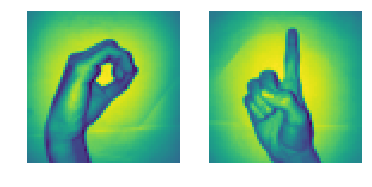

In [7]:
# view images from loaded dataset
img_size = 64
plt.subplot(121)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(122)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [15]:
# Concat '0' and '1' images along row to create an image array
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis=0) # 0..204 => '0' and 205..410 => '1'
y = np.concatenate((np.zeros(205), np.ones(205)), axis=0).reshape(X.shape[0], 1) # prepare 1D array to contain labels '0' and '1'

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (410, 64, 64)
y shape:  (410, 1)


+ Shape of X is (410, 64, 64)
    + 410 means number of images ('0' and '1')
    + 64, 64 means size of each image is 64x64 pixels
+ Shape of y is (410, 1)
    + 410 means that we have 410 labels ('0' and '1')
+ Now, split X and y into train and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
print('Train size: ', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size:  287
Test size:  123


As we have 3D input array (X) so we need to make it flatten (2D) in order to use as input for our Neural network. Lets flatten X array. 

In [11]:
X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
print('X train flatten shape: ', X_train_flatten.shape)
print('X test flatten shape: ', X_test_flatten.shape)

X train flatten shape:  (287, 4096)
X test flatten shape:  (123, 4096)


In [19]:
# Transpose X_train_flatten, X_test_flatten from (*, 4096) to (4096, *). This is required in order to work with Neural network in a right way. 
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = y_train.T
y_test = y_test.T

print(f'Train (X, y): {x_train.shape}, {y_train.shape}')
print(f'Test (X, y): {x_test.shape}, {y_test.shape}')

Train (X, y): (4096, 287), (1, 287)
Test (X, y): (4096, 123), (1, 123)


To classify images as '0' or '1', we can implement **Logistic Regression** as our basic Neural Network. 
Following is the computation graph of Logistic Regression:

![Logistic Regression computation graph](Notebook_images/LogisticRegression_ComputationGraph.png)

+ Parameters are weights and bias
+ Weights: coefficients of each pixel
+ Bias: intercept
+ $z = W^T * X + B$
+ $y_{head} = sigmoid(z)$
+ Sigmoid function makes z between zero and one which is the probability case. 
+ Why we use sigmoid function?
    + It gives the probabilistic result
    + It is differentiable so we can use it in gradient descent algorithm

### Initializing parameters

+ As we know our input image has 4096 pixels
+ Each image have own weights
+ The first step in Computation graph is multiplying each pixels with their own weights
+ We'll initialize each weight as `0.01`. (There are different techniques to initialize weight, but we want to keep it simple for this tutorial.)
+ Shape of our weight array would be (4096, 1)
+ Initialize bias as `0`

In [20]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

### Forward propogation
This involves all steps from pixels to calculation of cost.

+ Calculate z. $z = W^T * X + B$
+ Calculate $y_{head}$. $y_{head} = sigmoid(z)$
+ Calculate loss(error) function.

In [21]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [22]:
# Test sigmoid value at z = 0
sigmoid(0)

0.5

**Loss error function**

$loss = -(1-y)log(1-y^{hat}) - y * log(y^{hat})$

In [23]:
def calculate_loss(y_actual, y_calculated):
    return - y_actual * np.log(y_calculated) - (1-y_actual)*np.log(1-y_calculated)

In [24]:
def forward_propogation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = calculate_loss(y_train, y_head)
    cost = (np.sum(loss))/(x_train.shape[1]) # x_train.shape[1] is for scaling
    return cost

### Optimization algorithm using Gradient Descent

+ We need to decrease cost because we know if cost is high, then we make wrong predictions
+ In order to decrease cost, we need to update weights and bias. These are the only parameters which are in our control. 
+ Gradient Descent: This is a technique using which model learns parameters(weights and bias) to minimize the cost function.

In [25]:
def forward_backward_propgation(w, b, x_train, y_train):
    # forward propogation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = calculate_loss(y_train, y_head)
    cost = (np.sum(loss))/(x_train.shape[1]) # x_train.shape[1] is for scaling

    # backward propogation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {'derivative_weight':derivative_weight, 'derivative_bias':derivative_bias}
    return cost, gradients

In [26]:
# update the weights and parameters
def update(w, b, x_train, y_train, lr, epochs):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(epochs):
        cost, gradients = forward_backward_propgation(w, b, x_train, y_train)
        cost_list.append(cost)

        # update weights and bias
        w = w - lr * gradients['derivative_weight']
        b = b - lr * gradients['derivative_bias']

        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print(f'Epoch={i}, Cost={cost}')
    
    parameters = {'weight': w, 'bias': b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()
    return parameters, gradients, cost_list

In [27]:
def predict(w, b, x_test):
    z = np.dot(w.T, x_test) + b
    y_head = sigmoid(z)
    y_predictions = np.zeros((1, x_test.shape[1]))
    # if y_head > 0.5, predict sign '1'
    # if y_head < 0.5, predict sign '0'
    for i in range(y_head.shape[1]):
        if y_head[0, i] <= 0.5:
            y_predictions[0,i] = 0
        else:
            y_predictions[0,i] = 1
    
    return y_predictions

In [28]:
# Combine all pieces for Logistic Regression
def logistic_regression(x_train, y_train, x_test, y_test, lr = 0.01, epochs = 10):
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
    parameters, gradients,cost_list = update(w, b, x_train, y_train, lr, epochs)

    y_predictions_test = predict(parameters['weight'], parameters['bias'], x_test)
    y_predictions_train = predict(parameters['weight'], parameters['bias'], x_train)

    # Print train/test errors
    print ('Train Accuracy: {} %'.format(100 - np.mean(np.abs(y_predictions_train - y_train)) * 100))
    print ('Test Accuracy: {} %'.format(100 - np.mean(np.abs(y_predictions_test - y_test)) * 100))

Epoch=0, Cost=14.868690008981744
Epoch=10, Cost=1.720530262177149
Epoch=20, Cost=1.47140535756484
Epoch=30, Cost=1.425110728686412
Epoch=40, Cost=1.403031839559363
Epoch=50, Cost=1.3885557713031413
Epoch=60, Cost=1.3617252679326848
Epoch=70, Cost=1.3006961050646622
Epoch=80, Cost=1.1870079820535588
Epoch=90, Cost=1.009009408848679
Epoch=100, Cost=0.7551966860190084
Epoch=110, Cost=0.4185167134268114
Epoch=120, Cost=0.22107996414872427
Epoch=130, Cost=0.20137615037824177
Epoch=140, Cost=0.1964868324258806


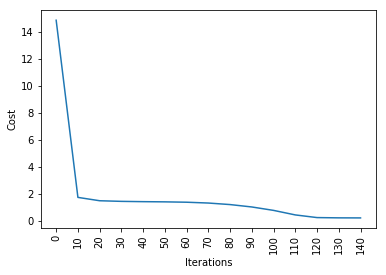

Train Accuracy: 92.33449477351917 %
Test Accuracy: 93.4959349593496 %


In [29]:
logistic_regression(x_train, y_train, x_test, y_test, epochs=150)